In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [3]:
file_path = './dataset/val.txt'
val_df = pd.read_csv(file_path, sep=';', header=None, names=['Text', 'Emotion'])
file_path = './dataset/test.txt'
test_df = pd.read_csv(file_path, sep=';', header=None, names=['Text', 'Emotion'])
file_path = './dataset/train.txt'
train_df = pd.read_csv(file_path, sep=';', header=None, names=['Text', 'Emotion'])

train_df.info()
print('-----------------------------------------------------------------------')
test_df.info()
print('-----------------------------------------------------------------------')
val_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     16000 non-null  object
 1   Emotion  16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB
-----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     2000 non-null   object
 1   Emotion  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
-----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     2000 non-null   object
 1   Emotion  2000 non-null   object
dtypes: o

In [4]:
val_df['Emotion'].value_counts()

joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: Emotion, dtype: int64

In [5]:
val_df['text_length'] = val_df['Text'].apply(len)
emo = val_df.iloc[val_df['text_length'].idxmax()][1]
txt = val_df.iloc[val_df['text_length'].idxmax()][0]
print('the text is: '+ txt)
print('the emotion is: '+ emo)

the text is: i couldnt hellip even when it made my heart ache to simply look at you hellip because i loved you so much and i knew you would never return my feelings hellip and i couldnt bring myself to hate you for the idiotic stunt you pulled in the other room either though i do ask that you dont repeat it
the emotion is: sadness


In [6]:
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
def text_processing(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if word not in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

val_df['Text'] = val_df['Text'].apply(text_processing)
train_df['Text'] = train_df['Text'].apply(text_processing)
test_df['Text'] = test_df['Text'].apply(text_processing)
train_df.sample(10)

,Text,Emotion
7802,feel glad home find much chang yet noth realli...,joy
3678,dream infuri husband woke feel infuri unfortun...,anger
11418,feel like servic core rel useless,sadness
13158,love sweet grate peopl serv speak member meet ...,joy
7262,feel like confus year old control,fear
12442,feel amaz everi thrift trip got mani small amo...,surprise
1218,use vent ugli feel viciou nasti rather deal li...,anger
5582,want sleep feel bad boy,sadness
4498,feel overwhelm think countri suffer,fear
11658,know feel distraught moodi depend two put smil...,fear


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score
nb_classifier = make_pipeline(TfidfVectorizer(), MultinomialNB())
svm_classifier = make_pipeline(TfidfVectorizer(), SVC())
x = train_df['Text']
y = train_df['Emotion']
nb_classifier.fit(x, y)
svm_classifier.fit(x, y)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])

In [9]:
nb_predictions = nb_classifier.predict(test_df['Text'])
svm_predictions = svm_classifier.predict(test_df['Text'])
nb_accuracy = accuracy_score(test_df['Emotion'], nb_predictions)
svm_accuracy = accuracy_score(test_df['Emotion'], svm_predictions)

print("Naive Bayes Classifier Accuracy:", nb_accuracy)
print("SVM Classifier Accuracy:", svm_accuracy)

Naive Bayes Classifier Accuracy: 0.688
SVM Classifier Accuracy: 0.839


In [10]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = make_pipeline(TfidfVectorizer(), RandomForestClassifier(random_state=42))
rf_classifier.fit(x, y)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [11]:
rf_predictions = rf_classifier.predict(test_df['Text'])
rf_accuracy = accuracy_score(test_df['Emotion'], rf_predictions)
print("Random Forest Classifier Accuracy:", rf_accuracy)

Random Forest Classifier Accuracy: 0.8505


In [12]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = make_pipeline(TfidfVectorizer(), DecisionTreeClassifier(random_state=42))
dt_classifier.fit(train_df['Text'], train_df['Emotion'])

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [13]:
dt_predictions = dt_classifier.predict(test_df['Text'])
dt_accuracy = accuracy_score(test_df['Emotion'], dt_predictions)
print("Decision Tree Classifier Accuracy:", dt_accuracy)

Decision Tree Classifier Accuracy: 0.7915


In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = make_pipeline(TfidfVectorizer(), KNeighborsClassifier())
knn_classifier.fit(train_df['Text'], train_df['Emotion'])

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [15]:
knn_predictions = knn_classifier.predict(test_df['Text'])
knn_accuracy = accuracy_score(test_df['Emotion'], knn_predictions)
print("KNN Classifier Accuracy:", knn_accuracy)

KNN Classifier Accuracy: 0.7545


In [16]:
from sklearn.linear_model import LogisticRegression
logistic_classifier = make_pipeline(TfidfVectorizer(), LogisticRegression(max_iter=1000))
logistic_classifier.fit(train_df['Text'], train_df['Emotion'])

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [17]:
logistic_predictions = logistic_classifier.predict(test_df['Text'])
logistic_accuracy = accuracy_score(test_df['Emotion'], logistic_predictions)
print("Logistic Regression Classifier Accuracy:", logistic_accuracy)

Logistic Regression Classifier Accuracy: 0.8415


In [18]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_classifier = make_pipeline(TfidfVectorizer(), GradientBoostingClassifier())
gbm_classifier.fit(train_df['Text'], train_df['Emotion'])


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [19]:
gbm_predictions = gbm_classifier.predict(test_df['Text'])
gbm_accuracy = accuracy_score(test_df['Emotion'], gbm_predictions)
print("Gradient Boosting Classifier Accuracy:", gbm_accuracy)

Gradient Boosting Classifier Accuracy: 0.7995


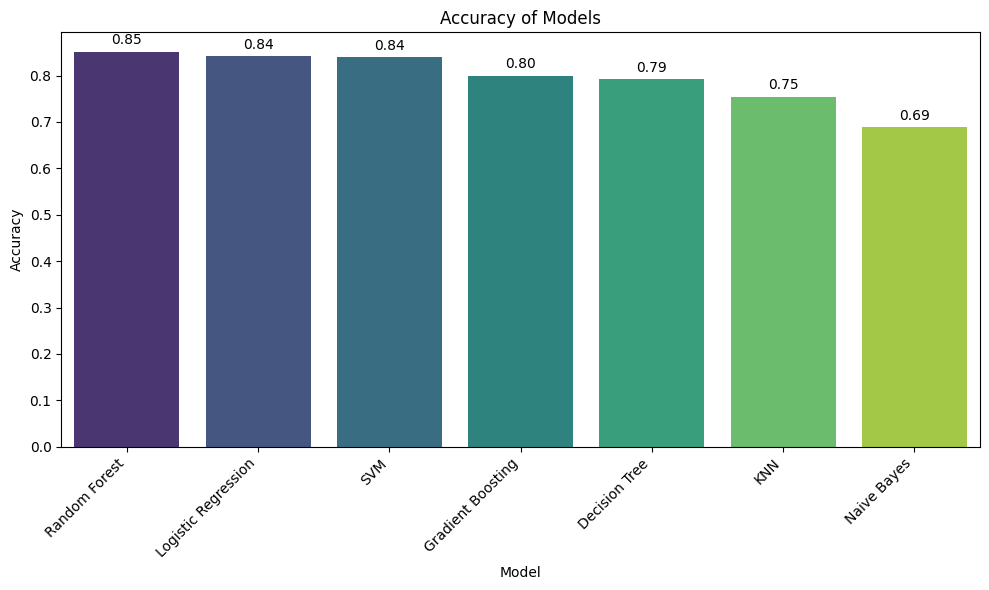

In [20]:
accuracies = {
    "Naive Bayes": nb_accuracy,
    "SVM": svm_accuracy,
    "Random Forest": rf_accuracy,
    "Decision Tree": dt_accuracy,
    "KNN": knn_accuracy,
    "Logistic Regression": logistic_accuracy,
    "Gradient Boosting": gbm_accuracy
}

# Sort accuracies in descending order
sorted_accuracies = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)

# Extract model names and accuracies
model_names = [model[0] for model in sorted_accuracies]
accuracy_values = [model[1] for model in sorted_accuracies]

# Create countplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=model_names, y=accuracy_values, palette="viridis")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy of Models")
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its accuracy value
for i, v in enumerate(accuracy_values):
    ax.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [21]:
from sklearn.ensemble import VotingClassifier

estimators = [
    ("Random Forest", rf_classifier),
    ("Logistic Regression", logistic_classifier),
    ("SVM", svm_classifier),
    ("Gradient Boosting", gbm_classifier),
    ("Decision Tree", dt_classifier)
]
voting_classifier = VotingClassifier(estimators, voting='hard')
voting_classifier.fit(train_df['Text'], train_df['Emotion'])
voting_predictions = voting_classifier.predict(test_df['Text'])
voting_accuracy = accuracy_score(test_df['Emotion'], voting_predictions)
print("Voting Classifier Accuracy:", round(voting_accuracy*100, 2), '%')


Voting Classifier Accuracy: 85.4 %


In [22]:
custom_text = "I was angry"
predicted_emotion = voting_classifier.predict([custom_text])
print("Predicted Emotion:", predicted_emotion[0])

Predicted Emotion: joy


In [23]:
import pickle

filename = "emotion_detection.pkl"
pickle.dump(voting_classifier, open(filename, 'wb'))

In [24]:
model = pickle.load(open('emotion_detection.pkl', 'rb'))